
# Movie Recommendation System using TF-IDF

This notebook builds a movie recommendation system using the TF-IDF vectorizer based on the movie overview descriptions. 
It includes data preprocessing, feature extraction, similarity calculations, and visualization of the results.


In [1]:
!pip install wordcloud --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

sns.set_theme(style="darkgrid")
sns.set_palette("muted")


In [3]:

# Load the movie dataset
df = pd.read_csv('5000_movies.csv')
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:

# Clean and preprocess the data
# Fill missing overviews with empty strings
df['overview'] = df['overview'].fillna('')

# Display the number of missing values to ensure data cleanliness
print("Missing overviews:", df['overview'].isnull().sum())


Missing overviews: 0


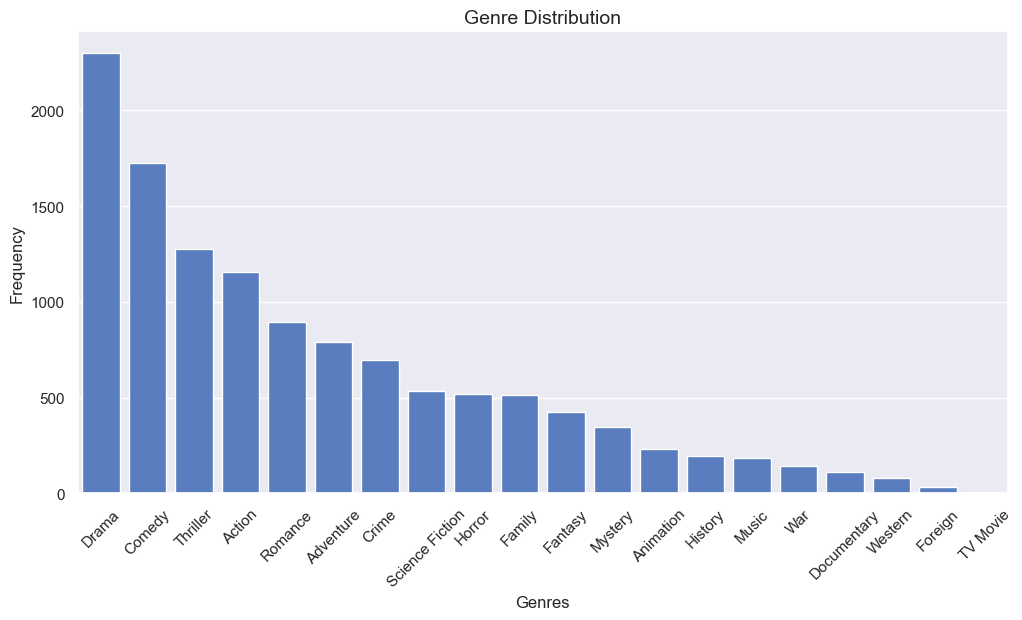

In [7]:

import json

# Extract and visualize the distribution of genres
def extract_genres(genre_str):
    try:
        genres = json.loads(genre_str)
        return [genre['name'] for genre in genres]
    except:
        return []

df['genres_list'] = df['genres'].apply(extract_genres)
genres = sum(df['genres_list'], [])
genre_counts = pd.Series(genres).value_counts()

# Plot genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Distribution', fontsize=14)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


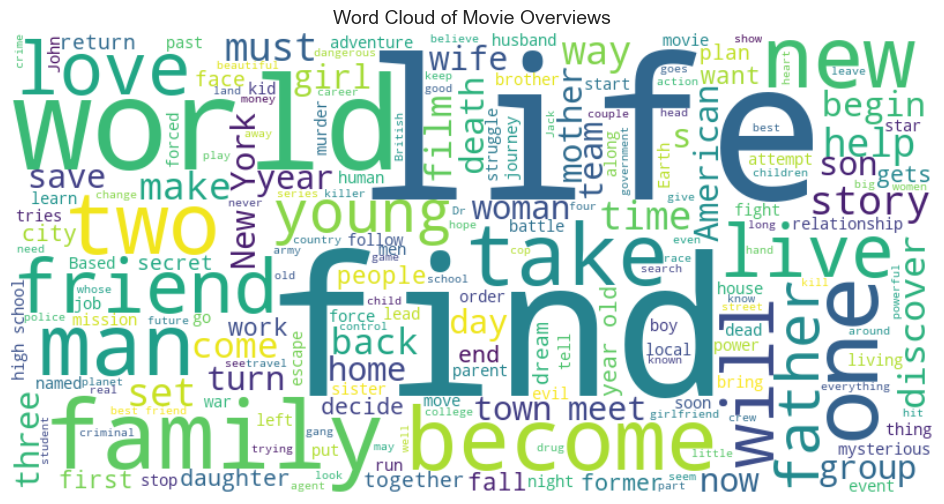

In [8]:

# Generate a word cloud from movie overviews
text = ' '.join(df['overview'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Overviews', fontsize=14)
plt.show()


In [10]:

# Apply TF-IDF Vectorizer to the overview column
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['overview'])

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")


TF-IDF matrix shape: (4803, 20978)


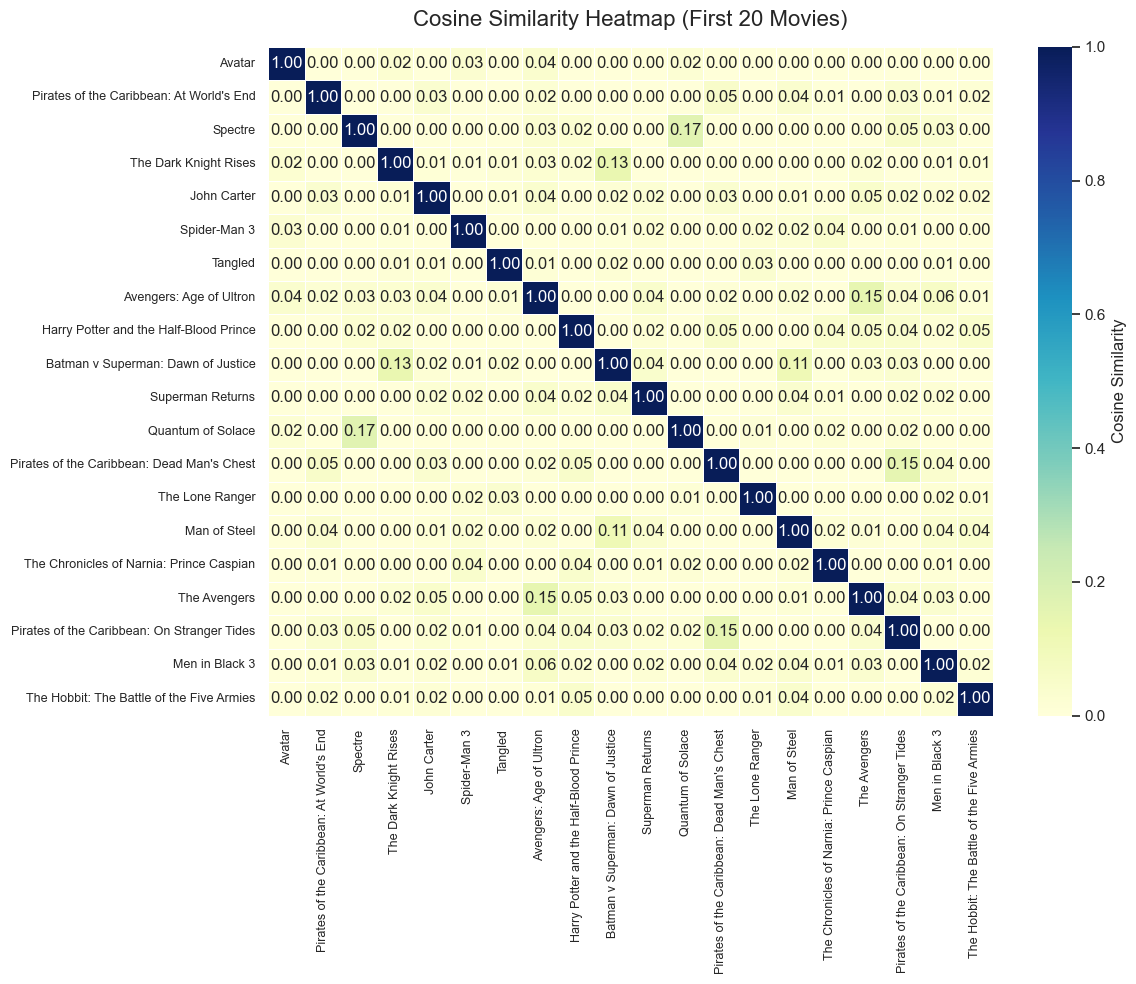

In [20]:
# Calculate cosine similarity between movies
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Select the first 20 movie titles for labeling
movie_titles = df['title'].iloc[:20]

# Plot a heatmap for the first 20 movies to visualize similarity scores
plt.figure(figsize=(12, 10))
sns.heatmap(
    cosine_sim[:20, :20],
    cmap='YlGnBu',
    xticklabels=movie_titles,
    yticklabels=movie_titles,
    linewidths=0.5,
    annot=True,
    fmt=".2f",
    cbar_kws={'label': 'Cosine Similarity'}
)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.title('Cosine Similarity Heatmap (First 20 Movies)', fontsize=16, pad=15)
plt.tight_layout()
plt.show()


In [34]:

def recommend_movies(description, top_n=5):
    tfidf_vectorizer = TfidfVectorizer(
        stop_words='english',
        ngram_range=(1, 3),           # Include unigrams, bigrams, and trigrams
        max_features=5000,            # Limit features for focused comparisons
        sublinear_tf=True,            # Apply sublinear TF scaling
        smooth_idf=True               # Prevent division by zero in IDF
    )
    
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['overview'].tolist() + [description])
    cosine_sim = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1]).flatten()

    # Boost scores with a small constant to avoid too low values and scale to 0-100
    scaled_scores = ((cosine_sim + 0.1) / 1.1 * 100).round(2)

    top_indices = cosine_sim.argsort()[-top_n:][::-1]
    recommendations = pd.DataFrame({
        'Title': df.iloc[top_indices]['title'],
        'Similarity Score (%)': scaled_scores[top_indices]
    })

    return recommendations

# Example usage:
description_input = "I like action movies set in space"
recommendations = recommend_movies(description_input)
display(recommendations)


,Title,Similarity Score (%)
880,Grindhouse,33.12
897,Deck the Halls,29.49
1709,Space Pirate Captain Harlock,27.82
1054,Scary Movie 2,27.74
1352,Gattaca,27.18


In [ ]:
 #Interpreting the Scores (New Scale):
#80–100%: Highly relevant recommendations.
#50–79%: Moderately relevant.
#20–49%: Some similarities, but less relevant.
#0–19%: Weak or no significant similarity.